# Regresión Lineal

Vamos a intentar predecir los precios de los coches con regresión lineal.

In [2]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
df = pd.read_csv("../datos/df_autorenew_nonulls_estand_sinout_encoded.csv", index_col=0)
df

,abtest,vehicleType,gearbox,model,price,monthOfRegistration,fuelType,brand,notRepairedDamage,tipo_coche,powerCV_robust,kilometer_robust
0,0.0,5062.437140,4543.454122,4889.463968,480,2361.651361,4577.937890,5278.253534,3129.203298,1866.224985,0.072957,0.0
1,0.0,9199.735501,4543.454122,4081.138863,18300,5772.465968,8422.844151,8688.614703,2178.951561,7030.947287,1.098361,-1.0
2,0.0,12548.975391,9897.289871,8284.186356,9800,5818.812204,8422.844151,10925.109554,3129.203298,7030.947287,0.672131,-1.0
3,0.0,2790.574777,4543.454122,4889.463968,1500,5884.419038,4577.937890,5278.253534,6662.250996,7030.947287,-0.754098,0.0
4,0.0,2790.574777,4543.454122,4224.542233,3600,6183.136948,8422.844151,6461.073722,6662.250996,7030.947287,-0.852459,-2.4
...,...,...,...,...,...,...,...,...,...,...,...,...
359179,0.0,5062.437140,2919.315009,4081.138863,2200,5979.542382,2933.153823,8953.519100,3129.203298,7030.947287,0.152342,-5.2
359180,0.0,9174.154837,9897.289871,3631.073557,1199,5770.775609,4577.937890,3545.469838,6662.250996,7030.947287,-0.327869,-1.0
359181,0.0,6628.733739,4543.454122,9869.882419,9200,5770.775609,8422.844151,5278.253534,6662.250996,1866.224985,-0.311475,0.0
359182,0.0,5773.536380,4543.454122,4889.463968,3400,5884.419038,8422.844151,5278.253534,3129.203298,7030.947287,-0.344262,0.0


In [4]:
# Separamos las variables
X = df.drop("price", axis=1)
y = df[["price"]]

In [5]:
# Separamos el train y el test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [6]:
# Aprendemos
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)

LinearRegression()

In [7]:
# Comprobamos como de bien predice
y_test_pred = modelo_lineal.predict(X_test)
y_train_pred = modelo_lineal.predict(X_train)

In [8]:
metricas = {
    'train': {
        'r2_score': r2_score(y_train, y_train_pred),
        'MAE': mean_absolute_error(y_train, y_train_pred),
        'MSE': mean_squared_error(y_train, y_train_pred),
        'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
    },
    'test': {
        'r2_score': r2_score(y_test, y_test_pred),
        'MAE': mean_absolute_error(y_test, y_test_pred),
        'MSE': mean_squared_error(y_test, y_test_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))

    }
}

In [15]:
pd.DataFrame(metricas).T

,r2_score,MAE,MSE,RMSE
train,0.622083,2745.186331,1.679343e+07,4097.978618
test,0.621305,2767.001681,1.712265e+07,4137.952071


Hemos observado que el R^2 score arroja un dato bastante bueno de 0.6, de hecho al intentar quitar algún parametro siempre obtenemos uno menor, por lo tanto, estamos obteniendo el mejor R^2 score incluyendo todas las variables independientes. 

En cuento al MAE y RMSE vemos que el RMSE al ser más estricto obtenemos un error bastante mayor, siendo el del test ligeramente superior al del train pero aún así son bastante parecidos, por lo que no hay ni overfitting ni underfitting. Sin embargo, este modelo nos da un gran margen de error que no es admisible para coches cuya mediana de precio es 3000 y media de 5500, ya que si el precio predicho oscila unos 4000 euros arriba o abajo no nos está diciendo nada. Deberíamos replantearnos en cambiar de modelo predictor ya que este no está funcionando.

### Visualización

In [16]:
y_test.reset_index(inplace=True, drop=True)
df_price_predicted = pd.DataFrame(y_test_pred).rename(columns={0:"price_predicted"})
df_concatenado = pd.concat([y_test, df_price_predicted], axis = 1)

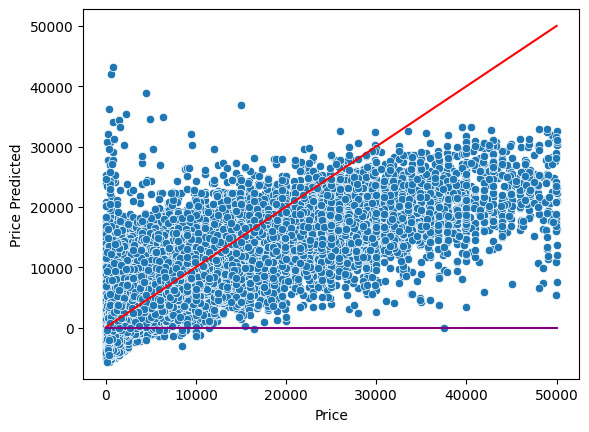

In [18]:
sns.scatterplot(data=df_concatenado, x="price", y="price_predicted")
plt.plot([0, 50000], [0, 50000], color="red")
plt.plot([0, 50000], [0, 0], color="purple")

plt.xlabel("Price")
plt.ylabel("Price Predicted")
plt.show()


En esta gráfica vemos enfrentados el precio original y el predicho en el test. La línea roja es en la cual deberían estar todos los puntos donde coincide el precio real con el predicho, sin embargo, vemos como a partir de los 20000 el valor predicho es menor que el valor real y no se agrupan alrededor de la recta. Por lo que aquí podemos observar un gran grupo de valores que no se está prediciendo correctamente.

Text(0.5, 1.0, 'Residuo frente al precio real')

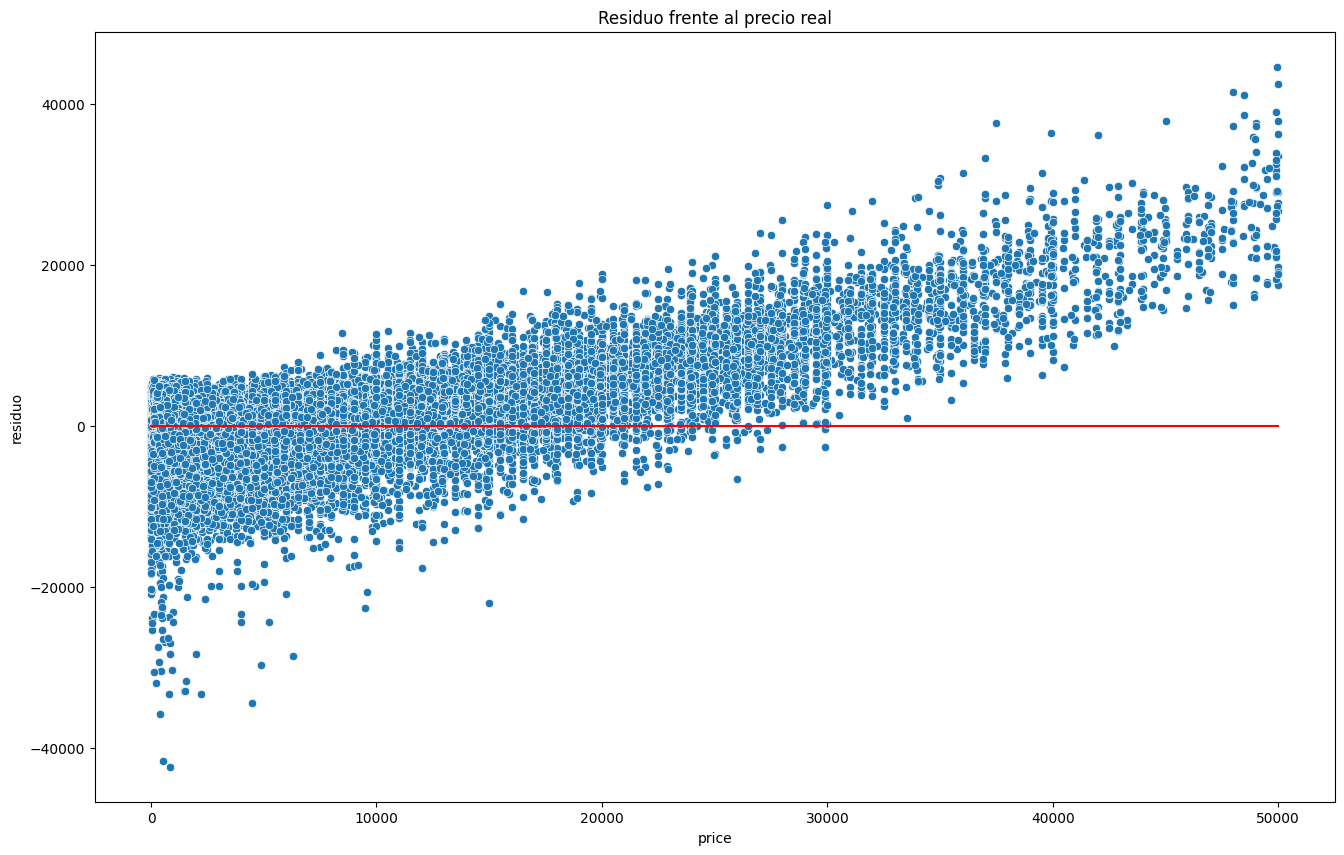

In [39]:
df_concatenado["residuo"] = df_concatenado["price"] - df_concatenado["price_predicted"]


plt.figure(figsize=(16, 10))
sns.scatterplot(df_concatenado, x="price", y="residuo")
plt.plot([0,50000],[0,0], color="red")
plt.title("Residuo frente al precio real")

En esta gráfica se ve de nuevo como el residuo a partir de los 20000 va en aumento, reforzando la toría anterior de que los coches a partir de este precio no se realiza una correcta predicción. La recta roja muestra el residu ideal que sería 0. También se puede observar que para algunos valores cercanos a 0 el residuo también es bastante mayor. A partir de esta gráfica podemos ver un poco donde no está funcionando nuestro modelo. 